# Pandas

- Dataframe
    - it is a 2D data structure
    - it is a table
    - it is a collection of series (columns)
- loading data
- selecting data
    - row wise
    - column wise
- adding data
    - row wise
    - column wise
- merging data
- filtering data
- grouping data
- cleaning data
    - missing data
    - duplicate data
    - outliers
- saving dat

In [1]:
data=[{'Fruit':'Apple','Price':'100'},{'Fruit':'Banana','Price':'200'}]
print(data)


[{'Fruit': 'Apple', 'Price': '100'}, {'Fruit': 'Banana', 'Price': '200'}]


In [2]:
import pandas as pd

In [3]:
data=[{'Fruit':'Apple','Price':'100'},{'Fruit':'Banana','Price':'200','Discount':'50'}]
pd.DataFrame(data)

,Fruit,Price,Discount
0,Apple,100,NaN
1,Banana,200,50


In [4]:
path='Fifa.xlsx'
fifa=pd.read_excel(path)

In [5]:
fifa

,Nationality,FIFA Ranking,National Team Kit Sponsor,Position,National Team Jersey Number,Player DOB,Club,Player Name,Appearances,Goals Scored,Assists Provided,Dribbles per 90,Interceptions per 90,Tackles per 90,Total Duels Won per 90,Save Percentage,Clean Sheets,Brand Sponsor/Brand Used
0,Argentina,2,Adidas,GK,23.0,1992-09-02 00:00:00,Aston Villa,Emiliano Martinez,7,0,0,0,0,0,0.65,0.4667,0.43,Adidas
1,Argentina,2,Adidas,GK,1.0,1986-10-16 00:00:00,River,Franco Armani,0,-,-,-,-,-,-,-,-,Nike
2,Argentina,2,Adidas,GK,12.0,1992-05-20 00:00:00,Villarreal,Geronimo Rulli,0,-,-,-,-,-,-,-,-,Adidas
3,Argentina,2,Adidas,DF,19.0,1988-02-12 00:00:00,Benfica,Nicolas Otamendi,7,0,1,0.33,1.17,1.3,7.17,-,-,Nike
4,Argentina,2,Adidas,DF,8.0,1991-10-28 00:00:00,Sevilla,Marcos Acuna,6,0,0,1.45,0.48,2.9,7.97,-,-,Nike
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
809,Canada,53,Nike,FW,17.0,1995-04-17 00:00:00,Club Brugge,Cyle Larin,3,0,0,1.33,0,0,1.95,-,-,Nike
810,Canada,53,Nike,FW,19.0,2000-11-02 00:00:00,Bayern Munich,Alphonso Davies,3,1,0,6,1,0.67,6.67,-,-,Nike
811,Canada,53,Nike,FW,20.0,2000-01-14 00:00:00,Lille,Jonathan David,3,0,0,1.41,0,0.47,1.88,-,-,Adidas
812,Canada,53,Nike,FW,23.0,1999-09-27 00:00:00,Basel,Liam Millar,1,0,0,0,0,0,0,-,-,Adidas


In [6]:
students=dict(
    id=[1,2,3,4,5,6,7,8,9,10],
    name=['John','Jane','Joe','Sam','Om','Era','Yor','lio','Rio','kili'],
    age=[15,27,36,45,51,62,73,80,90,80]
)

std=pd.DataFrame(students)
std

,id,name,age
0,1,John,15
1,2,Jane,27
2,3,Joe,36
3,4,Sam,45
4,5,Om,51
5,6,Era,62
6,7,Yor,73
7,8,lio,80
8,9,Rio,90
9,10,kili,80


In [7]:
housing=pd.read_csv('housing_data.csv')
housing

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Grvl,Reg,Lvl,AllPub,Inside,...,0,Gd,MnPrv,Shed,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Grvl,Reg,Lvl,AllPub,FR2,...,0,Gd,MnPrv,Shed,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,Grvl,IR1,Lvl,AllPub,Inside,...,0,Gd,MnPrv,Shed,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,Grvl,IR1,Lvl,AllPub,Corner,...,0,Gd,MnPrv,Shed,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,Grvl,IR1,Lvl,AllPub,FR2,...,0,Gd,MnPrv,Shed,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,Grvl,Reg,Lvl,AllPub,Inside,...,0,Gd,MnPrv,Shed,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,Grvl,Reg,Lvl,AllPub,Inside,...,0,Gd,MnPrv,Shed,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,Grvl,Reg,Lvl,AllPub,Inside,...,0,Gd,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,Grvl,Reg,Lvl,AllPub,Inside,...,0,Gd,MnPrv,Shed,0,4,2010,WD,Normal,142125


In [8]:
canada=pd.read_excel('Canada.xlsx',sheet_name='Canada by Citizenship',skiprows=20,skipfooter=2)
canada #! 1st method

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,Immigrants,Foreigners,Viet Nam,935,Asia,920,South-Eastern Asia,902,Developing regions,1191,...,1816,1852,3153,2574,1784,2171,1942,1723,1731,2112
191,Immigrants,Foreigners,Western Sahara,903,Africa,912,Northern Africa,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
192,Immigrants,Foreigners,Yemen,935,Asia,922,Western Asia,902,Developing regions,1,...,124,161,140,122,133,128,211,160,174,217
193,Immigrants,Foreigners,Zambia,903,Africa,910,Eastern Africa,902,Developing regions,11,...,56,91,77,71,64,60,102,69,46,59


In [9]:
canada=pd.read_excel('Canada.xlsx',sheet_name=1,skiprows=20,skipfooter=2)
canada #! 2nd method

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,Immigrants,Foreigners,Viet Nam,935,Asia,920,South-Eastern Asia,902,Developing regions,1191,...,1816,1852,3153,2574,1784,2171,1942,1723,1731,2112
191,Immigrants,Foreigners,Western Sahara,903,Africa,912,Northern Africa,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
192,Immigrants,Foreigners,Yemen,935,Asia,922,Western Asia,902,Developing regions,1,...,124,161,140,122,133,128,211,160,174,217
193,Immigrants,Foreigners,Zambia,903,Africa,910,Eastern Africa,902,Developing regions,11,...,56,91,77,71,64,60,102,69,46,59


In [10]:
std['id']

0     1
1     2
2     3
3     4
4     5
5     6
6     7
7     8
8     9
9    10
Name: id, dtype: int64

In [11]:
fifa.columns.tolist()

['Nationality ',
 'FIFA Ranking ',
 'National Team Kit Sponsor',
 'Position',
 'National Team Jersey Number',
 'Player DOB',
 'Club ',
 'Player Name ',
 ' Appearances',
 'Goals Scored ',
 'Assists Provided ',
 'Dribbles per 90',
 'Interceptions per 90',
 'Tackles per 90',
 'Total Duels Won per 90',
 'Save Percentage',
 'Clean Sheets',
 'Brand Sponsor/Brand Used']

In [12]:
fifa['Player Name '][:6]

0     Emiliano Martinez
1         Franco Armani
2        Geronimo Rulli
3      Nicolas Otamendi
4          Marcos Acuna
5    Nicolas Tagliafico
Name: Player Name , dtype: object

In [13]:
fifa['Club '].value_counts()

Barcelona              16
Bayern Munich          16
Manchester City        16
Manchester United      13
Al-Sadd                13
                       ..
Gamba Osaka             1
Daejon Citizen          1
Al Sadd                 1
Shandong Taishan        1
Vancouver Whitecaps     1
Name: Club , Length: 319, dtype: int64

In [14]:
import matplotlib.pyplot as plt

<AxesSubplot: >

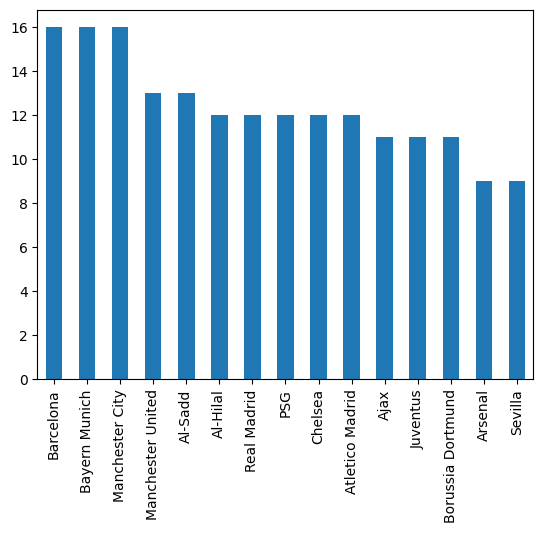

In [15]:
fifa['Club '].value_counts()[:15].plot(kind='bar')

In [16]:
#fifa['Club '].value_counts()[:15].plot(kind='line')

In [17]:
fifa['Club '].value_counts().size

319

In [18]:
std[['name','age']]

,name,age
0,John,15
1,Jane,27
2,Joe,36
3,Sam,45
4,Om,51
5,Era,62
6,Yor,73
7,lio,80
8,Rio,90
9,kili,80


In [19]:
housing.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [20]:
housing.LotArea #^ Acessing single column

0        8450
1        9600
2       11250
3        9550
4       14260
        ...  
1455     7917
1456    13175
1457     9042
1458     9717
1459     9937
Name: LotArea, Length: 1460, dtype: int64

In [21]:
housing[['MSSubClass','LotFrontage']]

,MSSubClass,LotFrontage
0,60,65.0
1,20,80.0
2,60,68.0
3,70,60.0
4,60,84.0
...,...,...
1455,60,62.0
1456,20,85.0
1457,70,66.0
1458,20,68.0


In [22]:
# second method for accessing more columns
cols=['MSSubClass','LotFrontage','LotArea']  #^ Multiple col 
housing[cols]

,MSSubClass,LotFrontage,LotArea
0,60,65.0,8450
1,20,80.0,9600
2,60,68.0,11250
3,70,60.0,9550
4,60,84.0,14260
...,...,...,...
1455,60,62.0,7917
1456,20,85.0,13175
1457,70,66.0,9042
1458,20,68.0,9717


Row selection using loc and iloc, head and tail

In [23]:
canada.set_index('OdName',inplace=True) #& this makes country column as the index column for canada dataframe
canada

,Type,Coverage,AREA,AreaName,REG,RegName,DEV,DevName,1980,1981,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
OdName,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Immigrants,Foreigners,935,Asia,5501,Southern Asia,902,Developing regions,16,39,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
Albania,Immigrants,Foreigners,908,Europe,925,Southern Europe,901,Developed regions,1,0,...,1450,1223,856,702,560,716,561,539,620,603
Algeria,Immigrants,Foreigners,903,Africa,912,Northern Africa,902,Developing regions,80,67,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
American Samoa,Immigrants,Foreigners,909,Oceania,957,Polynesia,902,Developing regions,0,1,...,0,0,1,0,0,0,0,0,0,0
Andorra,Immigrants,Foreigners,908,Europe,925,Southern Europe,901,Developed regions,0,0,...,0,0,1,1,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Viet Nam,Immigrants,Foreigners,935,Asia,920,South-Eastern Asia,902,Developing regions,1191,1829,...,1816,1852,3153,2574,1784,2171,1942,1723,1731,2112
Western Sahara,Immigrants,Foreigners,903,Africa,912,Northern Africa,902,Developing regions,0,0,...,0,0,1,0,0,0,0,0,0,0
Yemen,Immigrants,Foreigners,935,Asia,922,Western Asia,902,Developing regions,1,2,...,124,161,140,122,133,128,211,160,174,217


In [24]:
canada

,Type,Coverage,AREA,AreaName,REG,RegName,DEV,DevName,1980,1981,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
OdName,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Immigrants,Foreigners,935,Asia,5501,Southern Asia,902,Developing regions,16,39,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
Albania,Immigrants,Foreigners,908,Europe,925,Southern Europe,901,Developed regions,1,0,...,1450,1223,856,702,560,716,561,539,620,603
Algeria,Immigrants,Foreigners,903,Africa,912,Northern Africa,902,Developing regions,80,67,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
American Samoa,Immigrants,Foreigners,909,Oceania,957,Polynesia,902,Developing regions,0,1,...,0,0,1,0,0,0,0,0,0,0
Andorra,Immigrants,Foreigners,908,Europe,925,Southern Europe,901,Developed regions,0,0,...,0,0,1,1,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Viet Nam,Immigrants,Foreigners,935,Asia,920,South-Eastern Asia,902,Developing regions,1191,1829,...,1816,1852,3153,2574,1784,2171,1942,1723,1731,2112
Western Sahara,Immigrants,Foreigners,903,Africa,912,Northern Africa,902,Developing regions,0,0,...,0,0,1,0,0,0,0,0,0,0
Yemen,Immigrants,Foreigners,935,Asia,922,Western Asia,902,Developing regions,1,2,...,124,161,140,122,133,128,211,160,174,217


In [25]:
canada.columns

Index([    'Type', 'Coverage',     'AREA', 'AreaName',      'REG',  'RegName',
            'DEV',  'DevName',       1980,       1981,       1982,       1983,
             1984,       1985,       1986,       1987,       1988,       1989,
             1990,       1991,       1992,       1993,       1994,       1995,
             1996,       1997,       1998,       1999,       2000,       2001,
             2002,       2003,       2004,       2005,       2006,       2007,
             2008,       2009,       2010,       2011,       2012,       2013],
      dtype='object')

In [26]:
for col in canada:
    print(f'{col}{canada[col].nunique()}')

Type1
Coverage2
AREA6
AreaName6
REG22
RegName22
DEV2
DevName2
1980103
1981103
1982101
1983100
1984106
1985103
1986109
1987115
1988115
1989116
1990118
1991121
1992139
1993144
1994142
1995141
1996147
1997145
1998141
1999144
2000151
2001155
2002148
2003149
2004156
2005156
2006155
2007159
2008161
2009157
2010163
2011160
2012163
2013162


In [27]:
canada.index

Index(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       ...
       'United States of America', 'Uruguay', 'Uzbekistan', 'Vanuatu',
       'Venezuela (Bolivarian Republic of)', 'Viet Nam', 'Western Sahara',
       'Yemen', 'Zambia', 'Zimbabwe'],
      dtype='object', name='OdName', length=195)

In [28]:
canada.loc['Albania']

Type               Immigrants
Coverage           Foreigners
AREA                      908
AreaName               Europe
REG                       925
RegName       Southern Europe
DEV                       901
DevName     Developed regions
1980                        1
1981                        0
1982                        0
1983                        0
1984                        0
1985                        0
1986                        1
1987                        2
1988                        2
1989                        3
1990                        3
1991                       21
1992                       56
1993                       96
1994                       71
1995                       63
1996                      113
1997                      307
1998                      574
1999                     1264
2000                     1816
2001                     1602
2002                     1021
2003                      853
2004                     1450
2005      

In [29]:
canada.iloc[100]

Type               Immigrants
Coverage           Foreigners
AREA                      908
AreaName               Europe
REG                       926
RegName        Western Europe
DEV                       901
DevName     Developed regions
1980                        1
1981                        4
1982                        2
1983                        0
1984                        0
1985                        3
1986                        0
1987                        1
1988                        1
1989                        1
1990                        0
1991                        1
1992                        2
1993                        3
1994                        1
1995                        0
1996                        7
1997                        2
1998                        0
1999                        2
2000                        0
2001                        2
2002                        0
2003                        1
2004                        0
2005      

In [30]:
canada.iloc[10]

Type               Immigrants
Coverage           Foreigners
AREA                      908
AreaName               Europe
REG                       926
RegName        Western Europe
DEV                       901
DevName     Developed regions
1980                      234
1981                      238
1982                      201
1983                      117
1984                      127
1985                      165
1986                      196
1987                      265
1988                      198
1989                      227
1990                      158
1991                      189
1992                      131
1993                      132
1994                      133
1995                      153
1996                      191
1997                      152
1998                      190
1999                      117
2000                       97
2001                      134
2002                       87
2003                      113
2004                      118
2005      

In [31]:
canada.loc[['India','Albania']]

,Type,Coverage,AREA,AreaName,REG,RegName,DEV,DevName,1980,1981,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
OdName,,,,,,,,,,,,,,,,,,,,,
India,Immigrants,Foreigners,935,Asia,5501,Southern Asia,902,Developing regions,8880,8670,...,28235,36210,33848,28742,28261,29456,34235,27509,30933,33087
Albania,Immigrants,Foreigners,908,Europe,925,Southern Europe,901,Developed regions,1,0,...,1450,1223,856,702,560,716,561,539,620,603


In [32]:
canada.iloc[[0,3,6]]

,Type,Coverage,AREA,AreaName,REG,RegName,DEV,DevName,1980,1981,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
OdName,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Immigrants,Foreigners,935,Asia,5501,Southern Asia,902,Developing regions,16,39,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
American Samoa,Immigrants,Foreigners,909,Oceania,957,Polynesia,902,Developing regions,0,1,...,0,0,1,0,0,0,0,0,0,0
Antigua and Barbuda,Immigrants,Foreigners,904,Latin America and the Caribbean,915,Caribbean,902,Developing regions,0,0,...,14,24,32,15,32,38,27,37,51,25


Adding Data

In [33]:
students = pd.DataFrame({
    'id':[1,2,3,4,5,6,7,8,9,10],
    'name':['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j'],
    'english':[90,80,70,67,89,99,88,78,97,98],
    'math':[90,80,70,67,89,99,88,78,97,98],
    'science':[90,80,70,67,89,99,88,78,97,98]

}) # adding new record

In [34]:
students.append({
    'id':99,
    'name':'u',
    'english':65,
    'math':75,
    'science':95,
},ignore_index=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_9724\1403912014.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  students.append({


,id,name,english,math,science
0,1,a,90,90,90
1,2,b,80,80,80
2,3,c,70,70,70
3,4,d,67,67,67
4,5,e,89,89,89
5,6,f,99,99,99
6,7,g,88,88,88
7,8,h,78,78,78
8,9,i,97,97,97
9,10,j,98,98,98


In [35]:
new_students=pd.DataFrame({
    'id':[99,44,33],
    'name':['u','y','o'],
    'english':[65,23,78],
    'math':[75,99,67],
    'science':[95,90,34],
})
students=pd.concat([students,new_students],ignore_index=True)
#! concatinate the new dataframe to the old dataframe.
#^ focus on data not indexing

In [36]:
students

,id,name,english,math,science
0,1,a,90,90,90
1,2,b,80,80,80
2,3,c,70,70,70
3,4,d,67,67,67
4,5,e,89,89,89
5,6,f,99,99,99
6,7,g,88,88,88
7,8,h,78,78,78
8,9,i,97,97,97
9,10,j,98,98,98


In [37]:
students['english']+students['math']+students['science']

0     270
1     240
2     210
3     201
4     267
5     297
6     264
7     234
8     291
9     294
10    235
11    212
12    179
dtype: int64

In [38]:
students['total']=students['english']+students['math']+students['science']

In [39]:
students

,id,name,english,math,science,total
0,1,a,90,90,90,270
1,2,b,80,80,80,240
2,3,c,70,70,70,210
3,4,d,67,67,67,201
4,5,e,89,89,89,267
5,6,f,99,99,99,297
6,7,g,88,88,88,264
7,8,h,78,78,78,234
8,9,i,97,97,97,291
9,10,j,98,98,98,294


In [40]:
students['school']='CMS'# constasnt value for all

In [41]:
students

,id,name,english,math,science,total,school
0,1,a,90,90,90,270,CMS
1,2,b,80,80,80,240,CMS
2,3,c,70,70,70,210,CMS
3,4,d,67,67,67,201,CMS
4,5,e,89,89,89,267,CMS
5,6,f,99,99,99,297,CMS
6,7,g,88,88,88,264,CMS
7,8,h,78,78,78,234,CMS
8,9,i,97,97,97,291,CMS
9,10,j,98,98,98,294,CMS


In [42]:
def percentage(marks):
    return marks / 3

In [43]:
students['total'].apply(percentage)

0     90.000000
1     80.000000
2     70.000000
3     67.000000
4     89.000000
5     99.000000
6     88.000000
7     78.000000
8     97.000000
9     98.000000
10    78.333333
11    70.666667
12    59.666667
Name: total, dtype: float64

In [44]:
students['percentage']=students['total'].apply(percentage)

In [45]:
students

,id,name,english,math,science,total,school,percentage
0,1,a,90,90,90,270,CMS,90.000000
1,2,b,80,80,80,240,CMS,80.000000
2,3,c,70,70,70,210,CMS,70.000000
3,4,d,67,67,67,201,CMS,67.000000
4,5,e,89,89,89,267,CMS,89.000000
5,6,f,99,99,99,297,CMS,99.000000
6,7,g,88,88,88,264,CMS,88.000000
7,8,h,78,78,78,234,CMS,78.000000
8,9,i,97,97,97,291,CMS,97.000000
9,10,j,98,98,98,294,CMS,98.000000


In [46]:
a=pd.DataFrame({
    'name':['u','y','o','i'],
    'class':[6,8,9,7],
    'id':[1,2,3,7]
})
b=pd.DataFrame({
    'english':[65,23,78],
    'math':[75,99,67],
    'science':[95,90,34],
    'id':[1,8,3]
})

In [47]:
out=a.merge(b,how ='inner',on='id')
out

,name,class,id,english,math,science
0,u,6,1,65,75,95
1,o,9,3,78,67,34


In [48]:
out=a.merge(b,how ='outer',on='id')
out

,name,class,id,english,math,science
0,u,6.0,1,65.0,75.0,95.0
1,y,8.0,2,NaN,NaN,NaN
2,o,9.0,3,78.0,67.0,34.0
3,i,7.0,7,NaN,NaN,NaN
4,NaN,NaN,8,23.0,99.0,90.0


In [49]:
out=a.merge(b,how ='right',on='id')
out

,name,class,id,english,math,science
0,u,6.0,1,65,75,95
1,NaN,NaN,8,23,99,90
2,o,9.0,3,78,67,34


In [50]:
out=a.merge(b,how ='left',on='id')
out

,name,class,id,english,math,science
0,u,6,1,65.0,75.0,95.0
1,y,8,2,NaN,NaN,NaN
2,o,9,3,78.0,67.0,34.0
3,i,7,7,NaN,NaN,NaN


In [51]:
a.merge(b,left_index=True,right_index=True)

,name,class,id_x,english,math,science,id_y
0,u,6,1,65,75,95,1
1,y,8,2,23,99,90,8
2,o,9,3,78,67,34,3


In [52]:
b

,english,math,science,id
0,65,75,95,1
1,23,99,90,8
2,78,67,34,3


In [53]:
out=a.merge(b,left_index=True,right_index=True)
out

,name,class,id_x,english,math,science,id_y
0,u,6,1,65,75,95,1
1,y,8,2,23,99,90,8
2,o,9,3,78,67,34,3


filter, grouping, cleaning

In [54]:
students['total']>=200 #! boolean filter

0      True
1      True
2      True
3      True
4      True
5      True
6      True
7      True
8      True
9      True
10     True
11     True
12    False
Name: total, dtype: bool

In [55]:
students[students['total']>=250]

,id,name,english,math,science,total,school,percentage
0,1,a,90,90,90,270,CMS,90.0
4,5,e,89,89,89,267,CMS,89.0
5,6,f,99,99,99,297,CMS,99.0
6,7,g,88,88,88,264,CMS,88.0
8,9,i,97,97,97,291,CMS,97.0
9,10,j,98,98,98,294,CMS,98.0


In [56]:
students[students['name'].str.startswith('j')]

,id,name,english,math,science,total,school,percentage
9,10,j,98,98,98,294,CMS,98.0


In [57]:
students[~students['name'].str.startswith('j')]

,id,name,english,math,science,total,school,percentage
0,1,a,90,90,90,270,CMS,90.000000
1,2,b,80,80,80,240,CMS,80.000000
2,3,c,70,70,70,210,CMS,70.000000
3,4,d,67,67,67,201,CMS,67.000000
4,5,e,89,89,89,267,CMS,89.000000
5,6,f,99,99,99,297,CMS,99.000000
6,7,g,88,88,88,264,CMS,88.000000
7,8,h,78,78,78,234,CMS,78.000000
8,9,i,97,97,97,291,CMS,97.000000
10,99,u,65,75,95,235,CMS,78.333333


In [58]:
f1=students['name'].str.startswith('j')
f2=students['name'].str.startswith('a')
students[f1 | f2] #! any of condition

,id,name,english,math,science,total,school,percentage
0,1,a,90,90,90,270,CMS,90.0
9,10,j,98,98,98,294,CMS,98.0


In [59]:
housing['LotArea']>=10000

0       False
1       False
2        True
3       False
4        True
        ...  
1455    False
1456     True
1457    False
1458    False
1459    False
Name: LotArea, Length: 1460, dtype: bool

In [60]:
f1=housing['LotArea']>=10000
f2=housing['LotArea']>=20000
housing[f1 & f2]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
53,20,RL,68.000000,50271,Pave,Grvl,IR1,Low,AllPub,Inside,...,0,Gd,MnPrv,Shed,0,11,2006,WD,Normal,385000
113,20,RL,70.049958,21000,Pave,Grvl,Reg,Bnk,AllPub,Corner,...,0,Gd,MnPrv,Shed,0,10,2007,COD,Abnorml,217000
120,80,RL,70.049958,21453,Pave,Grvl,IR1,Low,AllPub,CulDSac,...,0,Gd,MnPrv,Shed,0,10,2006,WD,Normal,180000
171,20,RL,141.000000,31770,Pave,Grvl,IR1,Lvl,AllPub,Corner,...,0,Gd,MnPrv,Shed,0,5,2010,WD,Normal,215000
185,75,RM,90.000000,22950,Pave,Grvl,IR2,Lvl,AllPub,Inside,...,0,Gd,GdPrv,Shed,0,6,2006,WD,Normal,475000
197,75,RL,174.000000,25419,Pave,Grvl,Reg,Lvl,AllPub,Corner,...,512,Ex,GdPrv,Shed,0,3,2006,WD,Abnorml,235000
249,50,RL,70.049958,159000,Pave,Grvl,IR2,Low,AllPub,CulDSac,...,0,Gd,MnPrv,Shed,500,6,2007,WD,Normal,277000
271,20,RL,73.000000,39104,Pave,Grvl,IR1,Low,AllPub,CulDSac,...,0,Gd,MnPrv,Shed,0,4,2008,WD,Normal,241500
313,20,RL,150.000000,215245,Pave,Grvl,IR3,Low,AllPub,Inside,...,0,Gd,MnPrv,Shed,0,6,2009,WD,Normal,375000
335,190,RL,70.049958,164660,Grvl,Grvl,IR1,HLS,AllPub,Corner,...,0,Gd,MnPrv,Shed,700,8,2008,WD,Normal,228950


outliers r exception cases

In [63]:
canada

,Type,Coverage,AREA,AreaName,REG,RegName,DEV,DevName,1980,1981,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
OdName,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Immigrants,Foreigners,935,Asia,5501,Southern Asia,902,Developing regions,16,39,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
Albania,Immigrants,Foreigners,908,Europe,925,Southern Europe,901,Developed regions,1,0,...,1450,1223,856,702,560,716,561,539,620,603
Algeria,Immigrants,Foreigners,903,Africa,912,Northern Africa,902,Developing regions,80,67,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
American Samoa,Immigrants,Foreigners,909,Oceania,957,Polynesia,902,Developing regions,0,1,...,0,0,1,0,0,0,0,0,0,0
Andorra,Immigrants,Foreigners,908,Europe,925,Southern Europe,901,Developed regions,0,0,...,0,0,1,1,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Viet Nam,Immigrants,Foreigners,935,Asia,920,South-Eastern Asia,902,Developing regions,1191,1829,...,1816,1852,3153,2574,1784,2171,1942,1723,1731,2112
Western Sahara,Immigrants,Foreigners,903,Africa,912,Northern Africa,902,Developing regions,0,0,...,0,0,1,0,0,0,0,0,0,0
Yemen,Immigrants,Foreigners,935,Asia,922,Western Asia,902,Developing regions,1,2,...,124,161,140,122,133,128,211,160,174,217


In [64]:
years=list(range(1980,2014))
print(years)

[1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013]


In [66]:
canada[years].sum()

1980     99137
1981    110563
1982    104271
1983     75550
1984     73417
1985     69978
1986     86048
1987    134771
1988    139306
1989    164432
1990    188054
1991    207509
1992    221687
1993    222049
1994    193665
1995    187712
1996    200085
1997    192885
1998    160727
1999    179818
2000    216712
2001    242643
2002    223111
2003    217297
2004    232083
2005    257457
2006    247057
2007    232405
2008    243047
2009    248768
2010    276956
2011    246194
2012    256222
2013    257537
dtype: int64

<AxesSubplot: >

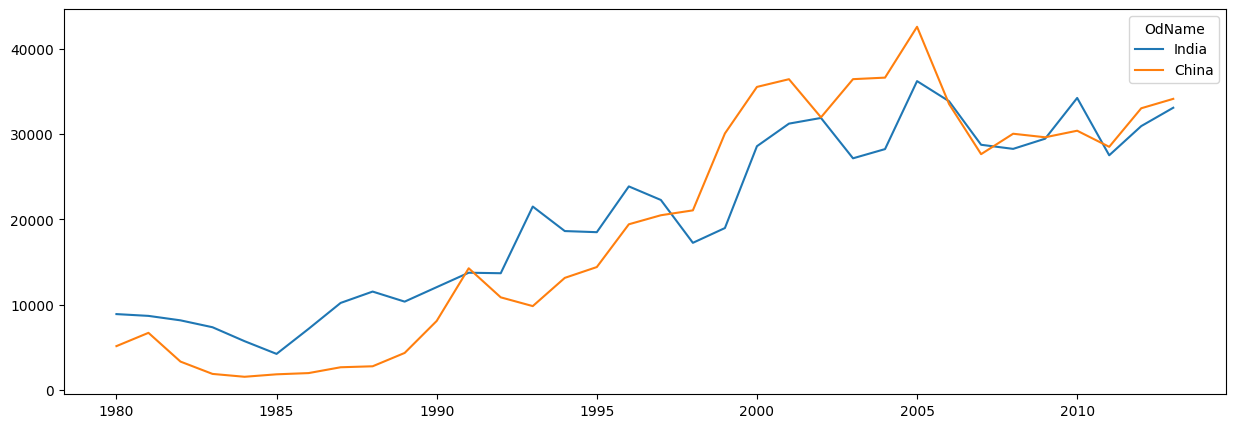

In [67]:
canada.loc[['India','China'],years].T.plot(kind='line',figsize=(15,5))

In [68]:
pd.set_option('display.max_columns',None)

Group By

In [70]:
canada['Total']=canada[years].sum(axis=1)

In [71]:
canada

,Type,Coverage,AREA,AreaName,REG,RegName,DEV,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
OdName,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Immigrants,Foreigners,935,Asia,5501,Southern Asia,902,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Immigrants,Foreigners,908,Europe,925,Southern Europe,901,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603,15699
Algeria,Immigrants,Foreigners,903,Africa,912,Northern Africa,902,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Immigrants,Foreigners,909,Oceania,957,Polynesia,902,Developing regions,0,1,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,6
Andorra,Immigrants,Foreigners,908,Europe,925,Southern Europe,901,Developed regions,0,0,0,0,0,0,2,0,0,0,3,0,1,0,0,0,0,0,2,0,0,1,0,2,0,0,1,1,0,0,0,0,1,1,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Viet Nam,Immigrants,Foreigners,935,Asia,920,South-Eastern Asia,902,Developing regions,1191,1829,2162,3404,7583,5907,2741,1406,1411,3004,3801,5870,5416,6547,5105,3723,2462,1752,1631,1419,1803,2117,2291,1713,1816,1852,3153,2574,1784,2171,1942,1723,1731,2112,97146
Western Sahara,Immigrants,Foreigners,903,Africa,912,Northern Africa,902,Developing regions,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2
Yemen,Immigrants,Foreigners,935,Asia,922,Western Asia,902,Developing regions,1,2,1,6,0,18,7,12,7,18,4,18,41,41,39,73,144,121,141,134,122,181,171,113,124,161,140,122,133,128,211,160,174,217,2985


In [72]:
canada.sort_values(by='Total',ascending=False, inplace=True) #! inplace = true means hamesha k liye , false kar denge toh mtlb ki sirf test karne k liye dekhna h  
canada.head()

,Type,Coverage,AREA,AreaName,REG,RegName,DEV,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
OdName,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
India,Immigrants,Foreigners,935,Asia,5501,Southern Asia,902,Developing regions,8880,8670,8147,7338,5704,4211,7150,10189,11522,10343,12041,13734,13673,21496,18620,18489,23859,22268,17241,18974,28572,31223,31889,27155,28235,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
China,Immigrants,Foreigners,935,Asia,906,Eastern Asia,902,Developing regions,5123,6682,3308,1863,1527,1816,1960,2643,2758,4323,8076,14255,10846,9817,13128,14398,19415,20475,21049,30069,35529,36434,31961,36439,36619,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
United Kingdom of Great Britain and Northern Ireland,Immigrants,Foreigners,908,Europe,924,Northern Europe,901,Developed regions,22045,24796,20620,10015,10170,9564,9470,21337,27359,23795,31668,23380,34123,33720,39231,30145,29322,22965,10367,7045,8840,11728,8046,6797,7533,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
Philippines,Immigrants,Foreigners,935,Asia,920,South-Eastern Asia,902,Developing regions,6051,5921,5249,4562,3801,3150,4166,7360,8639,11865,12509,12718,13670,20479,19532,15864,13692,11549,8735,9734,10763,13836,11707,12758,14004,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
Pakistan,Immigrants,Foreigners,935,Asia,5501,Southern Asia,902,Developing regions,978,972,1201,900,668,514,691,1072,1334,2261,2470,3079,4071,4777,4666,4994,9125,13073,9068,9979,15400,16708,15110,13205,13399,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600
